In [1]:
import torch
import torch.nn as nn
from torchviz import make_dot

In [2]:
class LinearModel(nn.Module):
    # 初始化类的参数
    def __init__(self, ndim):
        super(LinearModel, self).__init__()
        # 定义一个线性层，输入维度为ndim，输出维度为1
        self.ndim = ndim
        # 初始化权重和偏置，这里因为我们是以参数的形式传入，所以我们需要使用nn.Parameter来定义
        self.weight = nn.Parameter(torch.randn(ndim, 1, device='cuda'))
        self.bias = nn.Parameter(torch.randn(1, device='cuda'))

    # 定义前向计算函数
    def forward(self, x):
        # y = Wx + b
        return x.mm(self.weight) + self.bias

In [3]:
# 定义线性模型，定义线性模型的维度为5
lm = LinearModel(5)
# 初始化随机输入为一个5维的向量
x = torch.randn(4, 5, device='cuda')

In [4]:
# 根据模型获取输入对应的输出
lm(x)

tensor([[1.3847],
        [1.0537],
        [1.4413],
        [3.0127]], device='cuda:0', grad_fn=<AddBackward0>)

In [5]:
# 获取模型的参数（带名字）的生成器
lm.named_parameters()

<generator object Module.named_parameters at 0x7f6699aefb30>

In [6]:
# 使用列表获取生成器内容
list(lm.named_parameters())

[('weight',
  Parameter containing:
  tensor([[-2.1845],
          [ 0.5228],
          [-0.1789],
          [-0.0671],
          [-0.7632]], device='cuda:0', requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([1.2457], device='cuda:0', requires_grad=True))]

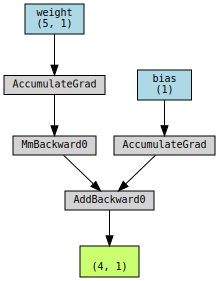

In [8]:
make_dot(lm(x), params=dict(lm.named_parameters()))

In [9]:
# 获取模型的参数（不带名字）的生成器
lm.parameters()


<generator object Module.parameters at 0x7fc4a48229e0>

In [11]:
# 使用列表获取生成器内容
# 但显然可读性很低
list(lm.parameters())

[Parameter containing:
 tensor([[-0.4819],
         [ 0.2838],
         [ 0.8957],
         [ 0.3630],
         [-0.0459]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([1.2387], device='cuda:0', requires_grad=True)]

In [12]:
# 将模型从CUDA设备转移到CPU设备上
lm.cpu()

LinearModel()

In [13]:
# 将模型转换为半精度浮点数
lm.half()

LinearModel()

In [14]:
# 将模型转换为训练模式
lm.train()

LinearModel()